In [2]:
import numpy as np
import pandas as pd
import os
import glob


In [46]:
root_path="/content/drive/My Drive/Uni Stuff/DSinLS/Task8/Tweets/CSV/"
all_files = glob.glob(root_path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, parse_dates=['timestamp'] ,header=0)
    li.append(df)
tweetsDF= pd.concat(li, axis=0, ignore_index=True)
tweetsDF = tweetsDF.loc[:, df.columns.intersection(['tweet_id','text','timestamp'])]
tweetsDF.head(5)

,text,timestamp,tweet_id
0,Two questions: What if the coronavirus is a na...,2020-04-26 23:59:59,1.254561e+18
1,Here's what's wrong with the Paycheck Protecti...,2020-04-26 23:59:59,1.254561e+18
2,Decomisan mercancía a 5 comerciantes en Av Pas...,2020-04-26 23:59:59,1.254561e+18
3,"""Tem que cheirar pro corona vírus não pegar em...",2020-04-26 23:59:59,1.254561e+18
4,Vacuna contra el coronavirus: dos laboratorios...,2020-04-26 23:59:59,1.254561e+18


In [26]:
filename="/content/drive/My Drive/Uni Stuff/DSinLS/Task8/LDA_Euronews_colab_topics.xlsx"
EuronewsTopicsSummeryDF = pd.read_excel(filename, index_col=None, header=0)
EuronewsTopicsSummeryDF=EuronewsTopicsSummeryDF.drop(['Unnamed: 0','Perc_Documents','Num_Documents'], axis=1)
EuronewsTopicsSummeryDF

,Topic_Keywords,Topic_Summary
0,"case, country, death, italy, number, report, s...",COVID-19 Statistics
1,"virus, vaccine, disease, people, test, study, ...",Medical Analysis
2,"lockdown, people, measure, country, restrictio...",Countermeasures
3,"mask, face, city, france, french, wear, order,...",Frensh goverment responses to COVID-19
4,"hospital, health, people, test, virus, trump, ...",Medical Facility
5,"eu, european, crisis, europe, country, commiss...",Impact on Europe
6,"time, thing, day, back, life, world, home, mak...",Life during COVID-19
7,"year, economy, economic, job, business, compan...",Economy Impact
8,"people, work, home, food, worker, time, family...",Life during Quarantine
9,"country, travel, quarantine, border, china, pa...",Flight restrictions


In [34]:
keywords=[]
for topic in EuronewsTopicsSummeryDF.Topic_Keywords.values:
  for keyword in topic.split(", "):
    keywords.append(keyword)


**TF**

In [66]:
def numOfWordsInTweet(keywords,tweet_text):
  numOfWords = dict.fromkeys(keywords, 0)
  if not  isinstance(tweet_text, str):
    tweet_text=""
  for word in tweet_text.split(' '):
      if word in numOfWords.keys():
        numOfWords[word] += 1
  return numOfWords


def computeTF(wordDict, tweet_text):
    if not  isinstance(tweet_text, str):
      tweet_text=""
    bagOfWords=tweet_text.split(' ')
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict


rows_list = []
for i in range(tweetsDF.shape[0]):
  wordDict=numOfWordsInTweet(keywords,tweetsDF.text[i])
  tfDict=computeTF(wordDict,tweetsDF.text[i])
  rows_list.append(tfDict)


tweetsDF_TF = pd.DataFrame(rows_list)  

**IDF**

In [79]:
import math
IDF_columns={}
for (columnName, columnData) in tweetsDF_TF.iteritems():
  count = sum(map(lambda x : x > 0, columnData.values))
  if count==0:
     IDF_columns[columnName]=0
  else:
     IDF_columns[columnName]=math.log((tweetsDF.shape[0]/count),2)

In [87]:
IDF_columns

{'add': 10.548751437410687,
 'airline': 11.736378440586458,
 'animal': 11.098948519971165,
 'app': 8.27694682194916,
 'back': 6.652455957041366,
 'border': 10.929023518528853,
 'boris_johnson': 0,
 'british': 15.906303442028769,
 'business': 8.298973128279158,
 'care': 7.298973128279159,
 'case': 8.05768050159943,
 'child': 10.048322446901198,
 'china': 10.677484751532889,
 'city': 9.1514159398653,
 'commission': 13.906303442028769,
 'company': 9.496912505891068,
 'confirm': 11.999412846420249,
 'country': 7.473761541640511,
 'crisis': 6.510769306566466,
 'data': 8.102172420845452,
 'day': 7.197219629478425,
 'death': 6.632507842814504,
 'die': 7.477943269324479,
 'disease': 8.32887461399302,
 'economic': 8.422487664764512,
 'economy': 8.042117297374489,
 'election': 10.262447252254045,
 'emergency': 8.808271359068243,
 'eu': 6.482137153210669,
 'europe': 15.906303442028769,
 'european': 15.906303442028769,
 'face': 7.675082261317583,
 'family': 8.26967882148512,
 'flight': 10.97556610

**TF_IDF**

In [83]:
tweetsDF_TF_IDF=pd.DataFrame(tweetsDF_TF)
for (columnName, columnData) in tweetsDF_TF_IDF.iteritems():
  tweetsDF_TF_IDF[columnName]=tweetsDF_TF_IDF[columnName].apply(lambda x: x*IDF_columns[columnName])


In [102]:
def columnName(keyword):
  for index, row in EuronewsTopicsSummeryDF.iterrows():
    if keyword in row['Topic_Keywords']:
      return row['Topic_Summary']



topic_summerized=[]
index=0
for MW_Value in tweetsDF_TF_IDF.idxmax(axis = 1):
  if tweetsDF_TF_IDF[MW_Value][index] > 0:
    topic_summerized.append(getTopic(MW_Value))
  else:
    topic_summerized.append("")
  index+=1

In [104]:
tweetsDF['Topic_Summary']=topic_summerized

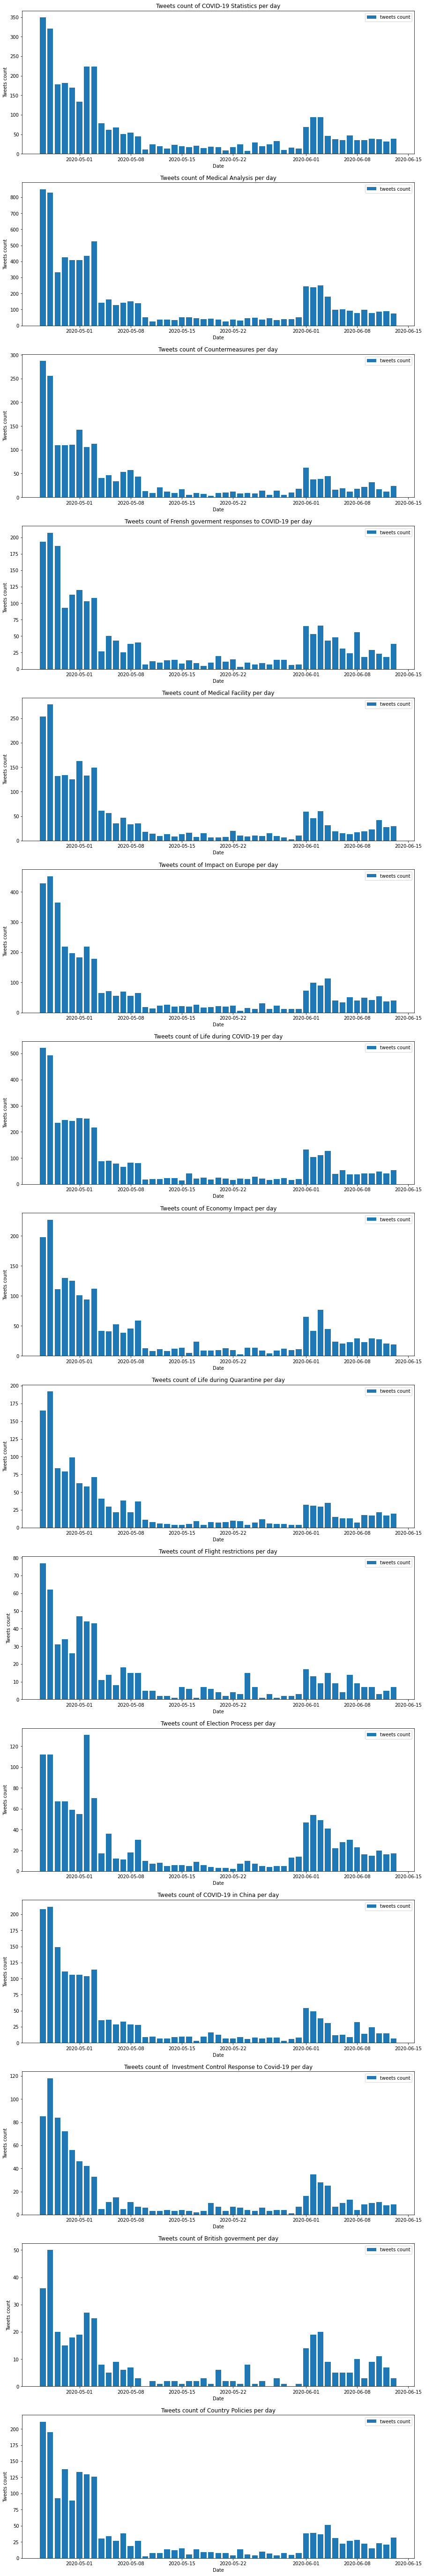

In [111]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline


fig, axs = plt.subplots(EuronewsTopicsSummeryDF.shape[0],figsize=(15,100))
for index, row in EuronewsTopicsSummeryDF.iterrows():
    dataFrame=tweetsDF[tweetsDF.Topic_Summary == row['Topic_Summary']]
    dataFrame = dataFrame.groupby(dataFrame['timestamp'].dt.date).size().reset_index(name='Count')
    axs[index].bar(dataFrame.timestamp.values, dataFrame.Count.values,label='tweets count')
    axs[index].set(xlabel='Date', ylabel='Tweets count',title='Tweets count of '+row['Topic_Summary']+' per day')
    axs[index].legend()
plt.show()

In [118]:
from textblob import TextBlob
polarity_list=[]
subjectivity_list=[]
for index, row in tweetsDF.iterrows():
  if isinstance(row.text, str):
    polarity_list.append(TextBlob(row.text).sentiment.polarity)
    subjectivity_list.append(TextBlob(row.text).sentiment.subjectivity)
  else:
    polarity_list.append(0)
    subjectivity_list.append(0)




In [120]:
tweetsDF['polarity']=polarity_list
tweetsDF['subjectivity']=subjectivity_list

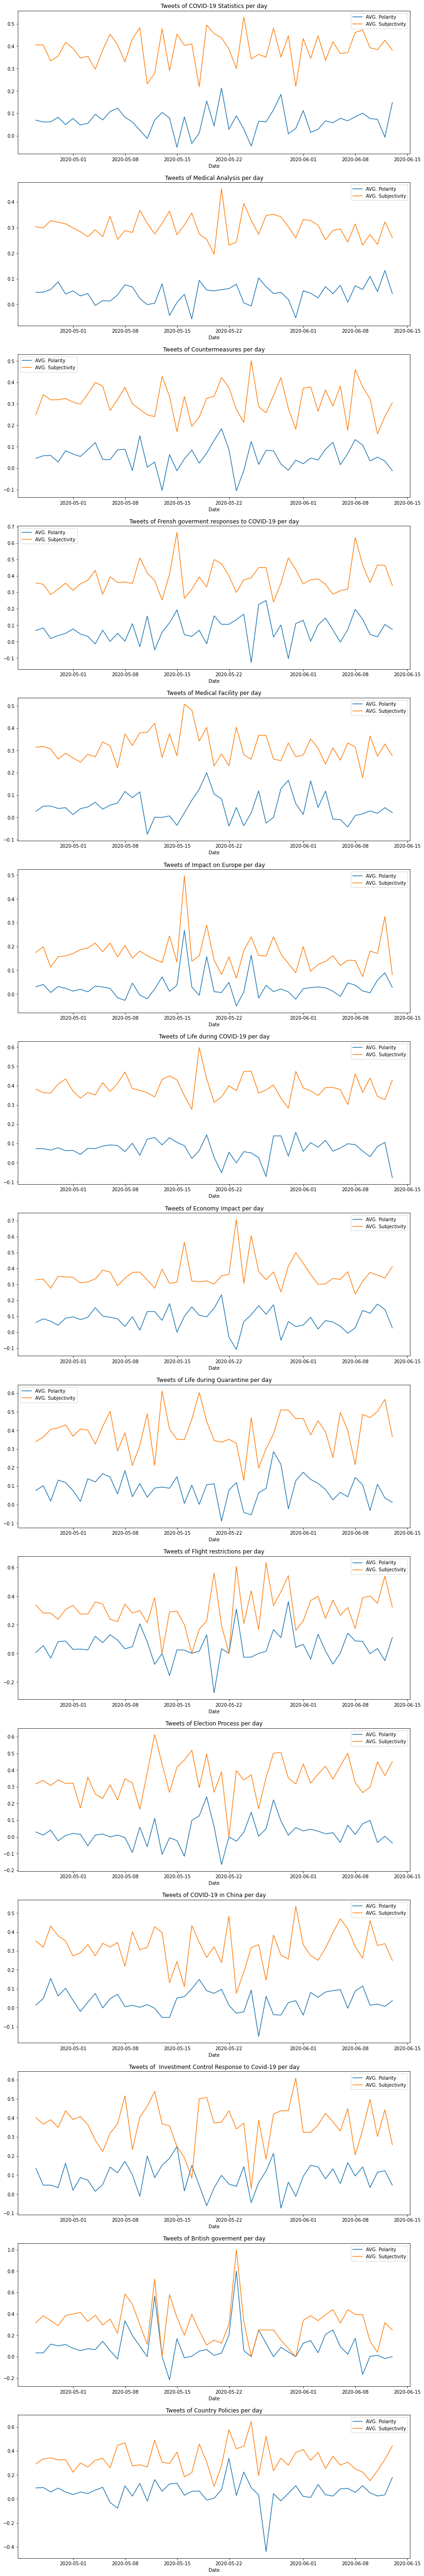

In [126]:
fig, axs = plt.subplots(EuronewsTopicsSummeryDF.shape[0],figsize=(15,100))
for index, row in EuronewsTopicsSummeryDF.iterrows():
    dataFrame = tweetsDF[tweetsDF.Topic_Summary == row['Topic_Summary']]
    dataFrame = dataFrame.groupby(dataFrame['timestamp'].dt.date).mean()
    axs[index].plot(dataFrame.index.values, dataFrame.polarity,label='AVG. Polarity')
    axs[index].plot(dataFrame.index.values, dataFrame.subjectivity,label='AVG. Subjectivity')
    axs[index].set(xlabel='Date',title='Tweets of '+row['Topic_Summary']+' per day')
    axs[index].legend()
plt.show()